#### Predicting COVID19 cases using time series forecasting

In [2]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#Reading train and test data; Data is available from John Hopkins

train_data=pd.read_csv('D:/Kaggle/Corona Virus forecast/Dataset/ca_train.csv')
test_data=pd.read_csv('D:/Kaggle/Corona Virus forecast/Dataset/ca_test.csv')

In [4]:
#Checking first few rows of test and train datasets
train_data.head()

#Variables - ID, Province/State, Country/Region, Lat & Long, Date, confirmedcases, fatalties

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


In [5]:
#Checking Level of the dataset
train_data.describe() #Getting descriptive statistics

#Check for unique entries
train_unique=train_data.nunique()

#Printing unique entries
train_unique

Id                61
Province/State     1
Country/Region     1
Lat                1
Long               1
Date              61
ConfirmedCases    14
Fatalities        13
dtype: int64

In [22]:
#Removing Country/Region, ID, Lat, Long, Province/State

train_data_upd=train_data.drop(['Id','Province/State','Country/Region','Lat','Long'], axis=1)
train_data_upd.head()


,Date,ConfirmedCases,Fatalities
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,0.0,0.0
3,2020-01-25,0.0,0.0
4,2020-01-26,0.0,0.0


In [23]:
#Summary statistics

train_data_upd.describe() #61 records, with no blanks

,ConfirmedCases,Fatalities
count,61.000000,61.000000
mean,143.131148,2.475410
std,352.078944,6.355068
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1642.000000,30.000000


In [40]:
#Remove records (Dates) with zero cases
train_data_upd=train_data_upd[train_data_upd['ConfirmedCases']>0]

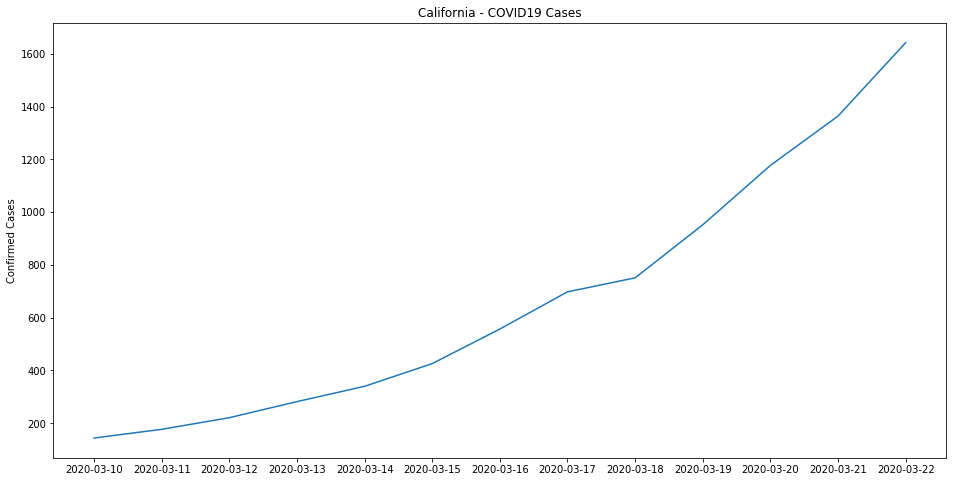

In [75]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.figure(figsize=(16,8))
plt.plot(train_data_upd.Date, train_data_upd['ConfirmedCases'])
plt.title('California - COVID19 Cases')
plt.ylabel('Confirmed Cases')
plt.show()


In [42]:
#Counting the number of data points
train_data_upd['ConfirmedCases'].count()

13

###  Data Prepartation for Model building

In [20]:
#We will start apply Mape and Check the best fit model
#Statsmodels is a Python module that provides classes and functions for implementing many different statistical models. 
#We need to import it into Python code as follows

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
#Converting date to time stamp
pd.to_datetime(train_data_upd.Date,format='%Y-%m-%d')
train_data_upd.index=train_data_upd.Date
train_data_upd

,Date,ConfirmedCases,Fatalities
Date,,,
2020-03-10,2020-03-10,144.0,2.0
2020-03-11,2020-03-11,177.0,3.0
2020-03-12,2020-03-12,221.0,4.0
2020-03-13,2020-03-13,282.0,4.0
2020-03-14,2020-03-14,340.0,5.0
2020-03-15,2020-03-15,426.0,6.0
2020-03-16,2020-03-16,557.0,7.0
2020-03-17,2020-03-17,698.0,12.0
2020-03-18,2020-03-18,751.0,13.0


### Test & Train Split

In [71]:
#Getting Test and Train Data; since we have 13 data points I am splitting the data into 11 Test & @ Train
train=train_data_upd.iloc[0:11]
test=train_data_upd.iloc[11:]
test

,Date,ConfirmedCases,Fatalities
Date,,,
2020-03-21,2020-03-21,1364.0,24.0
2020-03-22,2020-03-22,1642.0,30.0


### Simple Exponential smoothing

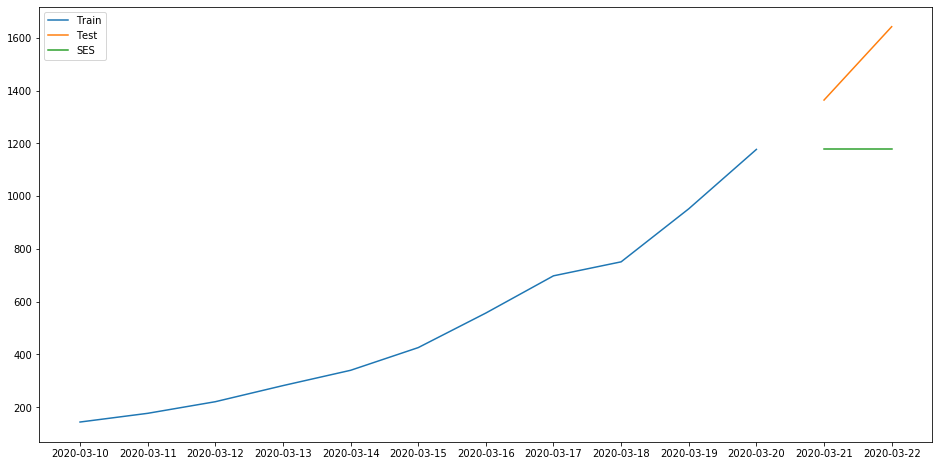

In [72]:
y_hat_avg = test.copy()

fit2 = SimpleExpSmoothing(np.asarray(train['ConfirmedCases'])).fit() #smoothing_level=0.6,optimized=False
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['ConfirmedCases'], label='Train')
plt.plot(test['ConfirmedCases'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [49]:
train

,Date,ConfirmedCases,Fatalities
Date,,,
2020-03-10,2020-03-10,144.0,2.0
2020-03-11,2020-03-11,177.0,3.0
2020-03-12,2020-03-12,221.0,4.0
2020-03-13,2020-03-13,282.0,4.0
2020-03-14,2020-03-14,340.0,5.0
2020-03-15,2020-03-15,426.0,6.0
2020-03-16,2020-03-16,557.0,7.0
2020-03-17,2020-03-17,698.0,12.0
2020-03-18,2020-03-18,751.0,13.0



### Holt's Linear Trend Method / double Exponential smoothing

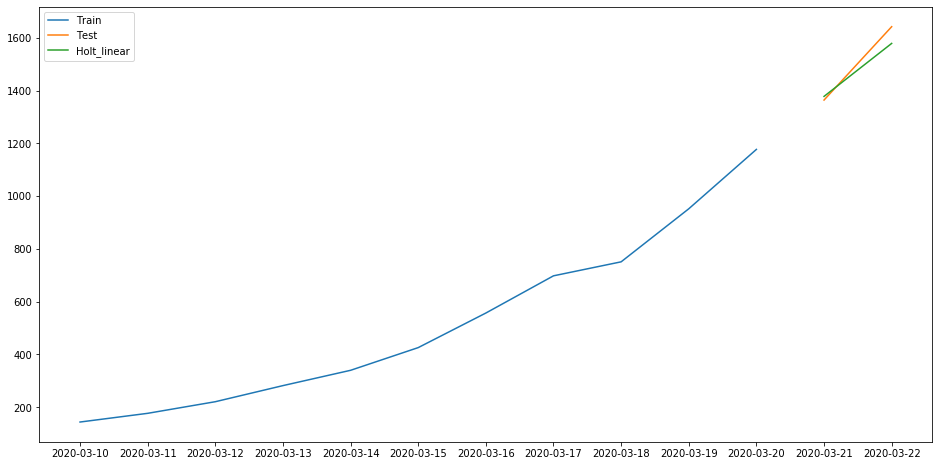

In [74]:
y_hat_avg = test.copy() #Creating Copy of test data

fit1 = Holt(np.asarray(train['ConfirmedCases'])).fit() #smoothing_level = 0.5,smoothing_slope = 0.5 (optional parameters)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))#Predicting Confirmed Cases for next two days

plt.figure(figsize=(16,8))
plt.plot(train['ConfirmedCases'], label='Train')
plt.plot(test['ConfirmedCases'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [86]:
#Using numpy to convert data frames to array for calculation purpose
test_array=np.asarray(y_hat_avg['ConfirmedCases'])
predicted_array=np.asarray(y_hat_avg['Holt_linear'])

### MAPE (Mean Absolute Percentage Error Calculation)

In [88]:

summation = 0  #variable to store the summation of differences

n = len(test) #finding total number of items in list

for i in range (0,n):  #looping through each element of the list
  difference =  abs((test_array[i] - predicted_array[i])/test_array[i])  #finding the difference between observed and predicted value
  #taking square of the differene 
  summation = summation + difference  #taking a sum of all the differences

MAPE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , str(MAPE))

The Mean Square Error is:  0.024358760688250308


### Holt's winters

C:\Users\91905\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


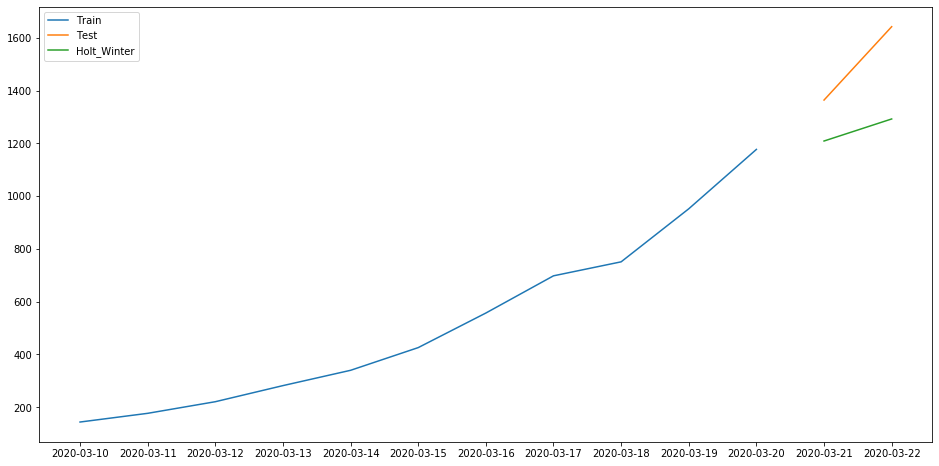

In [65]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['ConfirmedCases']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['ConfirmedCases'], label='Train')
plt.plot(test['ConfirmedCases'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [91]:
cd

C:\Users\91905
